# Kinematic analysis of an four-bar elliptic exercising machine

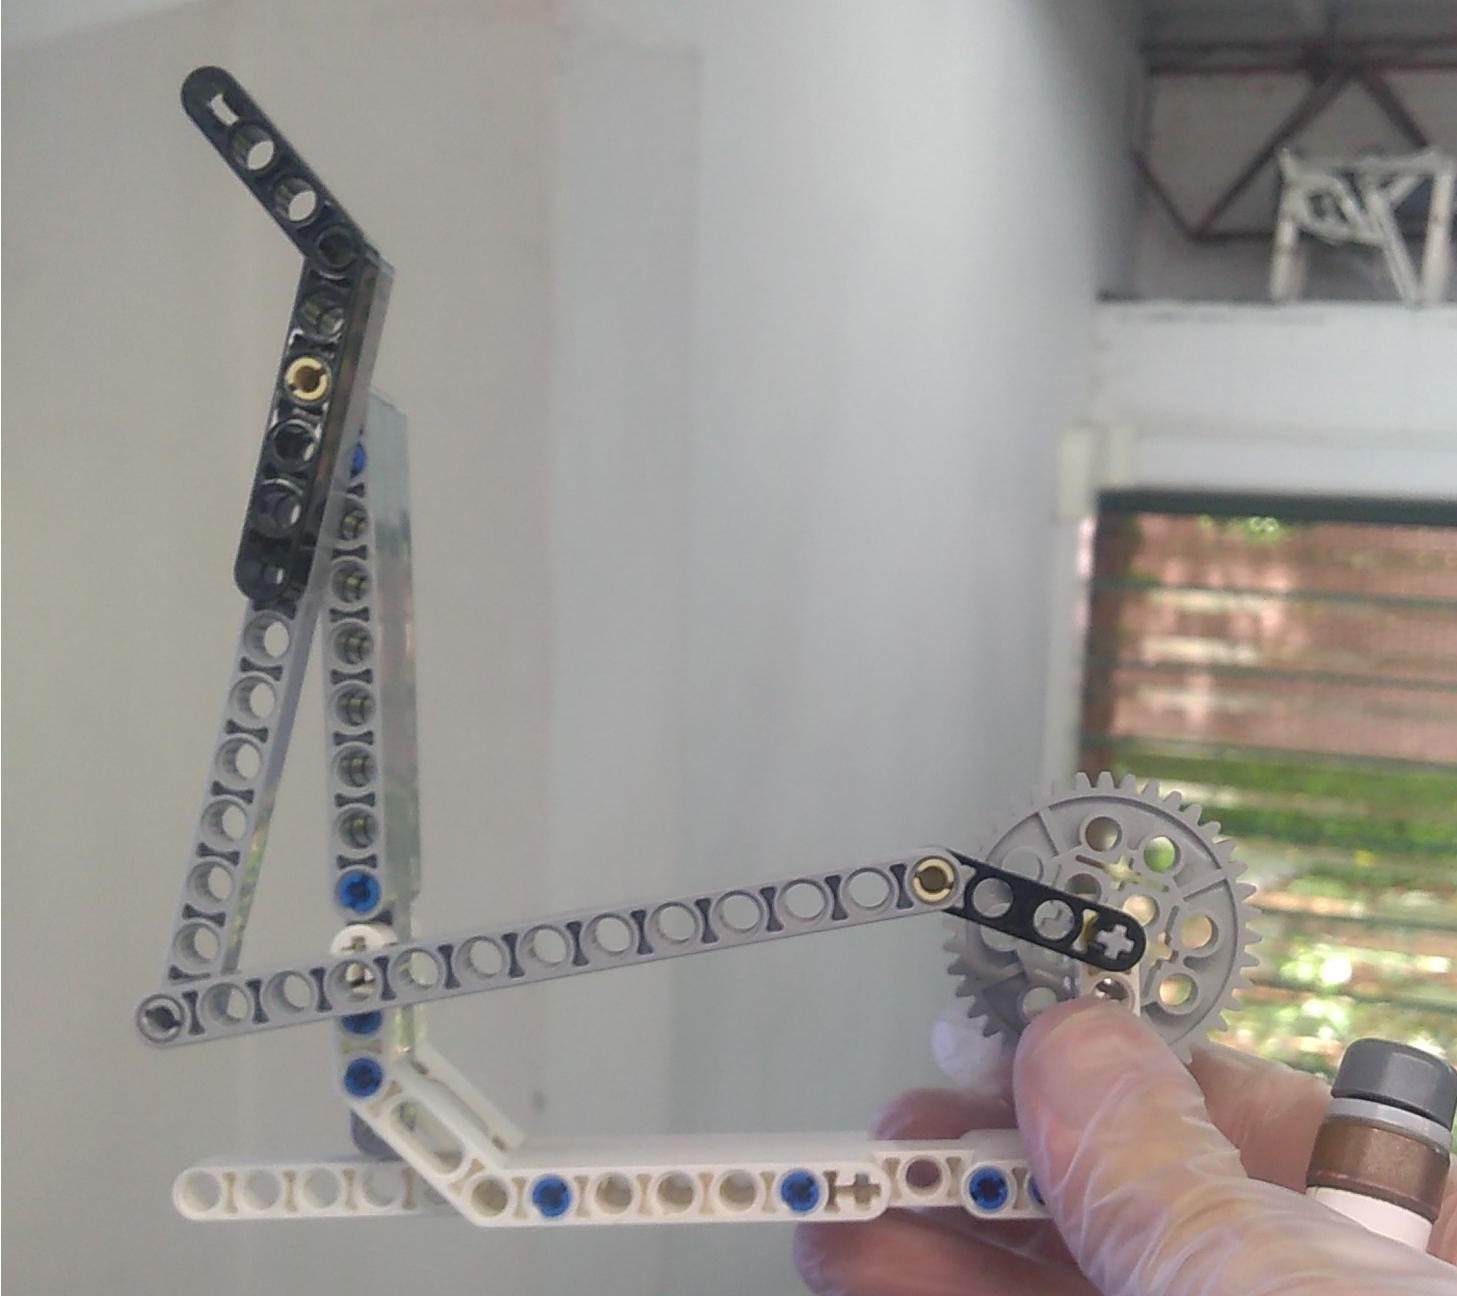

This mechanism was designed in (aqui pongo el año) by (...) (autor & otro, 2021). Recomendación para gestionar referencias y citas: Mendeley.

Para buscar información en las bases de datos de la UPB: https://bibliotecavirtual.upb.edu.co/

Shyu et. al. (2011) proposed a adjustable 2 degrees of freedom elliptical excercising machine that .....

More information about this mechanism can be found on Norton (2009).

otra forma de citar: ... kinematic analysis of this mechanism has been done in the reviewed literature (Norton, 2009).

Another implementation of an elliptical machine (...)

## Kinematic analysis

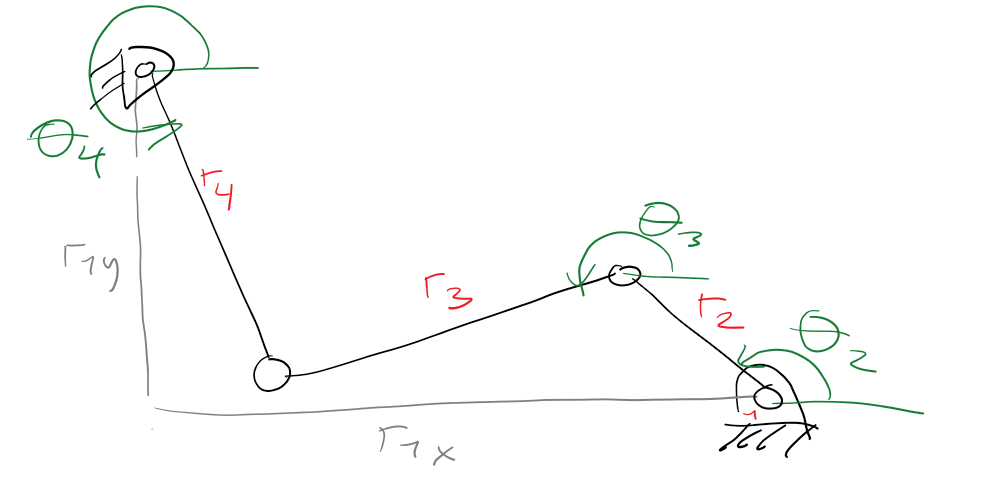

### Mobility (Degrees of Freedom)

$n = 4$

$f_1 = 4$

$f_2 = 0$

\begin{equation}
F = 3(n-1)-2f_1-f_2
\end{equation}

given $n$, $f_1$ and $f_2$, the DOF of the studied mechanism are obtained from evaluating (1)

$F = 1$ (2).

### Parameters and variables

Parameters: $r_2,r_3,r_4,r_{1x},r_{1y}$

Main variables: $\theta_2$

Secondary variables: $\theta_3, \theta_4$

### Vector diagram

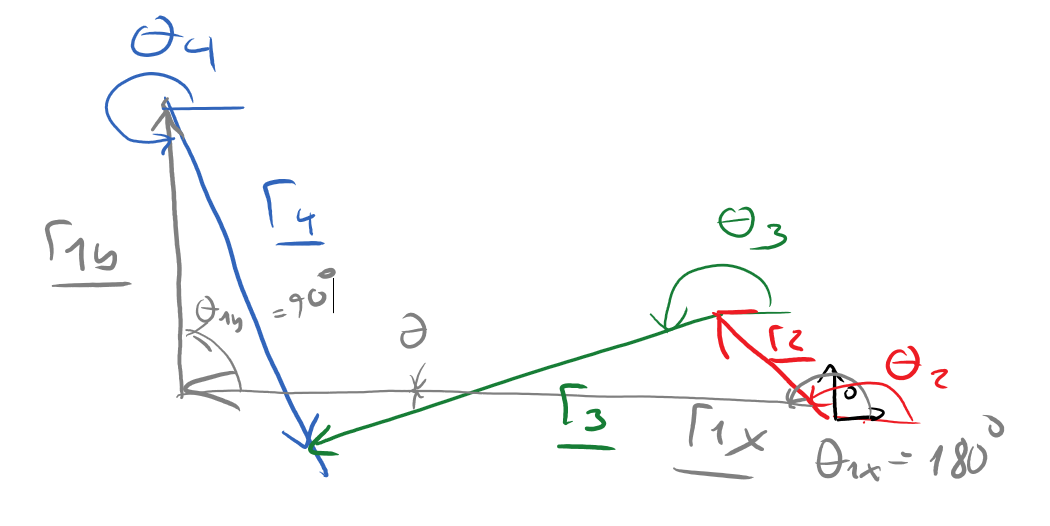

(aquí continuaría el análisis con las ecuaciones vectoriales y escalares)

### Kinematic analysis - implementation

#### Initialization

In [ ]:
import numpy as np
from scipy.optimize import fsolve 
import matplotlib.pyplot as plt

#### Function definition

In [26]:
def eliptica(condIni, params):
    #variable de entrada y parámetros
    ## Primero la variable de entrada
    th2 = params[0]
    ## Luego los parámetros
    r2 = params[1]
    r3 = params[2]
    r4 = params[3]
    r1x = params[4]
    r1y = params[5]
    
    #estos son arrays de Numpy
    th3 = condIni[0]
    th4 = condIni[1]
    
    Y = np.zeros(2)
    Y[0] = r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1y*np.cos(np.pi/2) - r1x*np.cos(np.pi);
    Y[1] = r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1y*np.sin(np.pi/2) - r1x*np.sin(np.pi);
    
    return Y
    pass

#### Function test

In [27]:
r2 = 3
r3 = 12
r4 = 10
r1x = 12
r1y = 9

th2 = np.deg2rad(160)

parametros = [th2,r2,r3,r4,r1x,r1y]

th3ini = np.deg2rad(190)
th4ini = np.deg2rad(255)

x0 = [th3ini,th4ini]

print(eliptica(x0,parametros))

[-0.04858045 -0.39845944]


#### Solution of non linear equations

In [28]:
q,info,exitflag,mensaje = fsolve(eliptica,
                                 x0,
                                 args = parametros,
                                 full_output = True)
print("solucion = ",np.rad2deg(q),"\n",exitflag,"\n",mensaje)
th3 = q[0]
th4 = q[1]

solucion =  [187.91942241 254.30817035] 
 1 
 The solution converged.


#### Point definition for mechanism graphic representation

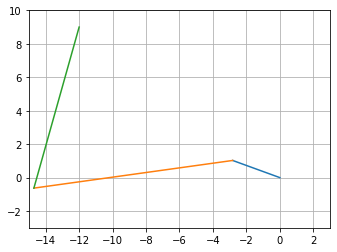

In [29]:
Ox = 0
Oy = 0
Ax = r2*np.cos(th2)
Ay = r2*np.sin(th2)
Bx = Ax + r3*np.cos(th3)
By = Ay + r3*np.sin(th3)
Cx = Bx - r4*np.cos(th4)
Cy = By - r4*np.sin(th4)

fig = plt.figure()
hr2 = plt.plot([Ox,Ax],[Oy,Ay])
hr3 = plt.plot([Bx,Ax],[By,Ay])
hr4 = plt.plot([Cx,Bx],[Cy,By])
plt.axis("scaled")
plt.xlim(-r2-r3,r2)
plt.ylim(-r2,r4)
plt.grid()
plt.draw() 

## References

autor, c., & otro, a. (2021). Libro de las elipticas. Medellín: UPB.

Norton, Robert L. 2009. Diseño de Maquinaria. 4th ed. McGraw-Hill Interamericana de España S.L.

Shyu, J. -., Chen, C. -., Yu, C. -., & Luo, Y. -. (2011). Research and development of an adjustable elliptical exerciser doi:10.4028/www.scientific.net/AMR.308-310.2078 Retrieved from www.scopus.com